<br>

<center><img src="https://www.htu.edu.jo/images/ThumbnailsCoverPhotos/HTU%20Logo-250px.png" alt="HTU"  width="180px" align="center">


<br>

<p>

**Data Mining**

10204310

Section (3)

**Analyze and Implement data mining application**

**Submitted to**

Eng. Bassam Kasasbeh

**Submitted on**

January 30th, 2024

**Submitted by**

Marwan Tarek Shafiq Al Farah

**Student ID**

21110011

Fall 2023 – 2024
</p></center>

# **Importing Libraries**

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# **Helping Functions**

In [102]:
# A function to apply various feature extraction algorithms
def apply_feature_extraction(name, X, n_components):
  if name == 'PCA':
    model = PCA(n_components=n_components)
  elif name == 'ICA':
    model = FastICA(n_components=n_components)
  elif name == 'TSVD':
    model = TruncatedSVD(n_components=n_components)
  return model.fit_transform(X)

In [103]:
# A Function to apply various clustering algorithms
def apply_clustering(name, X, y, eps, min_samples):
  if name == 'KMeans':
    model = KMeans(n_clusters=2)
  elif name == 'Hierarchical':
    model = AgglomerativeClustering(n_clusters=2)
  elif name == 'DBSCAN':
    model = DBSCAN(eps=eps, min_samples=min_samples)
  elif name == 'True Labels':
    return np.array(y)
  return model.fit_predict(X)

In [104]:
# A Function to calculate all Evaluation Metrics for all Models
def evaluate_clustering(y_true, y_pred, X):
  return {
      'Adjusted Rand Score': adjusted_rand_score(y_true, y_pred),
      'Adjusted Mutual Info Score': adjusted_mutual_info_score(y_true, y_pred),
      'Silhouette Score': silhouette_score(X, y_pred) if len(set(y_pred)) > 1 else None,
      'Calinski-Harabasz Score': calinski_harabasz_score(X, y_pred) if len(set(y_pred)) > 1 else None,
      'Davies-Bouldin Score': davies_bouldin_score(X, y_pred) if len(set(y_pred)) > 1 else None
      }

In [105]:
# A Function for Plotting all Models' Performance for Each Metric
def evaluation_plots(metric_names, evaluation_results):
  metrics_data = {metric: [] for metric in metric_names}

  for feature_method, cluster_method, scores in evaluation_results:
    for metric in metric_names:
      metrics_data[metric].append((f"{feature_method} + {cluster_method}", scores.get(metric, None)))

  for metric in metric_names:
    plt.figure(figsize=(10, 4))
    labels, values = zip(*metrics_data[metric])
    plt.bar(labels, values, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(metric)
    plt.show()

# **Loading the Dataset**

In [106]:
# Reading The Dataset
df = pd.read_csv('Telecom Network Quality Metrics Dataset.csv')

# Seperating the Dataset and the True Labels
X = StandardScaler().fit_transform(df[df.columns[1:-1]])
y_true = df['ServiceQuality'].map({'High': 1, 'Low': 0})

In [107]:
# Defining all the Feature Extraction and Clustering Methods, and the Evaluation Metrics
feature_methods = ['PCA', 'ICA', 'TSVD']
clustering_methods = ['True Labels', 'KMeans', 'Hierarchical', 'DBSCAN']
metric_names = ['Adjusted Rand Score', 'Adjusted Mutual Info Score', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']

# **Feature Extraction, Clustering Algorithms, and Plotting Clusters**

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


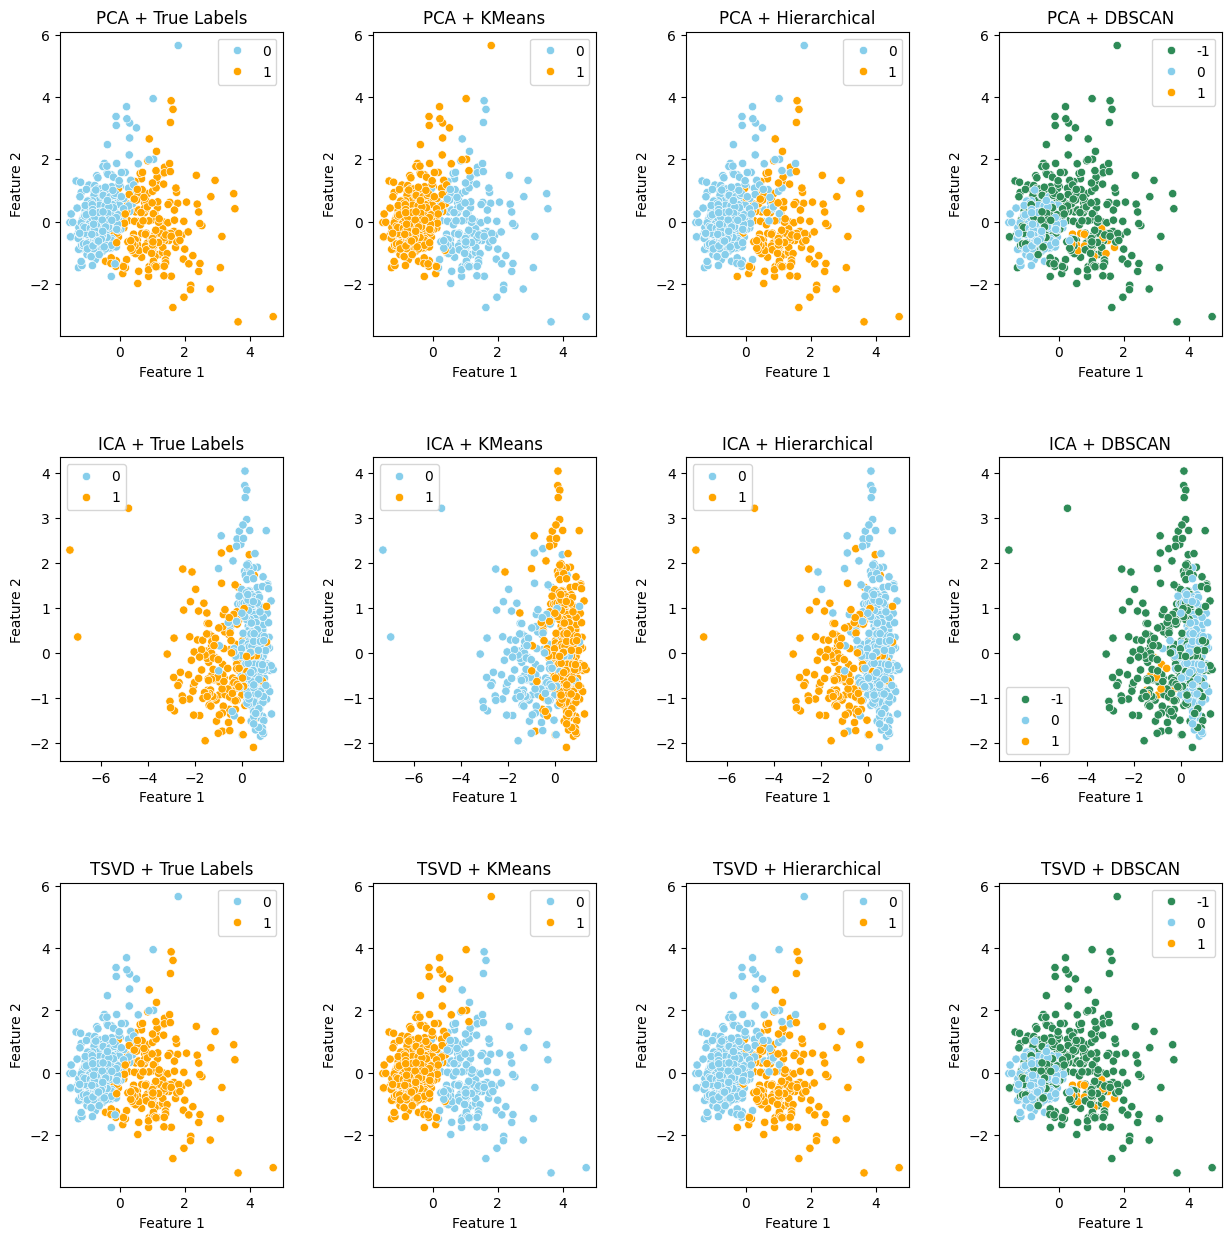

In [108]:
# Initializting a list for all the results, and a dataframe to store all the y_pred
results = []
predictions = pd.DataFrame()

# Creating a plot to plot all the clusters of all the combinations
fig, axes = plt.subplots(len(feature_methods), len(clustering_methods), figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, feature_method in enumerate(feature_methods):
  # Applying feature extraction and standard scaling the data
  scaler = StandardScaler()
  X_ext = scaler.fit_transform(apply_feature_extraction(feature_method, X, n_components=5))
  for j, cluster_method in enumerate(clustering_methods):
    # Applying clustering algorithms
    y_pred = apply_clustering(cluster_method, X_ext, y_true, 0.8, 9)
    # Storing the y_pred
    predictions[f"{feature_method} + {cluster_method}"] = y_pred
    # Storing the evaluation results, and keeping the baseline values for comparision (True Labels)
    results.append((feature_method, cluster_method, evaluate_clustering(y_true, y_pred, X_ext)))
    # To remove outliers from DBSCAN
    if (y_pred == -1).sum():
      results.append((feature_method, cluster_method + " without outliers", evaluate_clustering(y_true[y_pred != -1], y_pred[y_pred != -1], X_ext[y_pred != -1])))
      
    palette = {0: 'skyblue', 1: 'orange', -1: 'seagreen'}
    ax = axes[i, j]
    sns.scatterplot(x=X_ext[:, 0], y=X_ext[:, 1], palette=palette, hue=y_pred, ax=ax)
    ax.set_title(f"{feature_method} + {cluster_method}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.show()

# **Evaluating and Comparing the Results**

In [109]:
# Converting the results to a DataFrame and outputting it
df_reults = pd.DataFrame()
for i, j, k in results:
    df_reults[f"{i} + {j}"] = k
df_reults = df_reults.T
df_reults

,Adjusted Rand Score,Adjusted Mutual Info Score,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
PCA + True Labels,1.000000,1.000000,0.186436,90.797327,2.145069
PCA + KMeans,0.793803,0.731140,0.211780,97.385877,2.004440
PCA + Hierarchical,0.686873,0.593204,0.199697,88.180982,2.083203
PCA + DBSCAN,0.217356,0.248727,-0.022498,30.817991,2.460461
PCA + DBSCAN without outliers,0.593188,0.481269,0.262996,30.378221,1.004671
ICA + True Labels,1.000000,1.000000,0.186436,90.797327,2.145069
ICA + KMeans,0.793803,0.731140,0.211780,97.385877,2.004440
ICA + Hierarchical,0.686873,0.593204,0.199697,88.180982,2.083203
ICA + DBSCAN,0.217356,0.248727,-0.022498,30.817991,2.460461
ICA + DBSCAN without outliers,0.593188,0.481269,0.262996,30.378221,1.004671


**Evaluation of the Results**

**Clustering Metrics Analysis**

1.  **Adjusted Rand Score (ARS):** This measures the similarity between two clusterings, accounting for chance. It ranges from 0 to 1, where 1 indicates perfect clustering agreement.
*   PCA, ICA, TSVD with True Labels: As expected, these combinations yielded a perfect score of 1.00, serving as an ideal benchmark.
*   PCA, ICA, TSVD with KMeans: They ARS (0.79), indicating robust clustering close to the true labels.
*   PCA, ICA, TSVD with Hierarchical: All scored moderately around 0.69, suggesting decent but not optimal clustering.
*   PCA, ICA, TSVD with DBSCAN: All showed low scores around 0.22, indicating poor clustering performance.
*   PCA, ICA, TSVD with DBSCAN without outliers: All showed low scores around 0.59, suggesting decent but not optimal clustering.

2.   **Adjusted Mutual Information (AMI) Score:** It quantifies the mutual information between clusterings, adjusted for chance. Like ARS, it ranges from 0 to 1.
*   PCA, ICA, TSVD with True Labels: Achieved the maximum score of 1.00.
*   PCA, ICA, TSVD with KMeans: Scored above 0.73, suggesting good clustering agreement.
*   PCA, ICA, TSVD with Hierarchical: Moderately effective with scores around 0.59.
*   PCA, ICA, TSVD with DBSCAN: Demonstrated poor performance with scores around 0.25.
*   PCA, ICA, TSVD with DBSCAN without outliers:Slightly effective with scores around 0.48.

3.   **Silhouette Score:** Evaluates how similar an object is to its own cluster compared to other clusters. A high score indicates well-clustered data.
*   PCA, ICA, TSVD with True Labels: Showed a high performance but lower than other (around 0.18), indicating distinct and well-separated clusters.
*   PCA, ICA, TSVD with KMeans: Showed a high performance around 0.21, indicating distinct and well-separated clusters.
*   PCA, ICA, TSVD with Hierarchical: Slightly lower scores around 0.20, still indicating reasonable cluster formation.
*   PCA, ICA, TSVD with DBSCAN: Negative score (-0.02), suggesting overlapping clusters or inappropriate clustering.
*   PCA, ICA, TSVD with KMeans: Showed the best performance around 0.26, indicating distinct and well-separated clusters.

4.    **Calinski-Harabasz Score:** Higher scores imply better-defined clusters.
*   PCA, ICA, TSVD with KMeans: Scored highest (above 97), indicating excellent cluster separation.
*   PCA, ICA, TSVD with True Labels and Hierarchical Clustering: Moderately high scores (around 90).
*   PCA, ICA, TSVD with DBSCAN: Significantly lower scores around 30, indicating poor cluster definition.
*   PCA, ICA, TSVD with DBSCAN: Significantly lower scores around 30, indicating poor cluster definition.

5.   **Davies-Bouldin Score:** Lower scores are better, indicating clusters are well separated.
*   All Algorithms besides DBSCAN without outliers: Showed similar performance (ranging from 2.00 to 2.35), with the lowest for KMeans indicating slightly better separation.
*   DBSCAN without outliers: Showed a score of about 1.

**Conclusion**

*   KMeans Clustering (especially when combined with PCA and TSVD) demonstrated the most effective performance across most metrics, indicating its suitability for this dataset.
*   Hierarchical Clustering showed moderate effectiveness, suitable for applications where hierarchical groupings are essential.
*   DBSCAN was the least effective, indicating it might not be suitable for the characteristics of this dataset or requires parameter tuning.

This analysis suggests that for the Telecom Network Quality Metrics Dataset, KMeans combined with PCA or TSVD is the most effective clustering approach. However, the choice of clustering technique should also consider the specific requirements and characteristics of the dataset and the clustering task.

# **Visual Representation of the Evaluation**

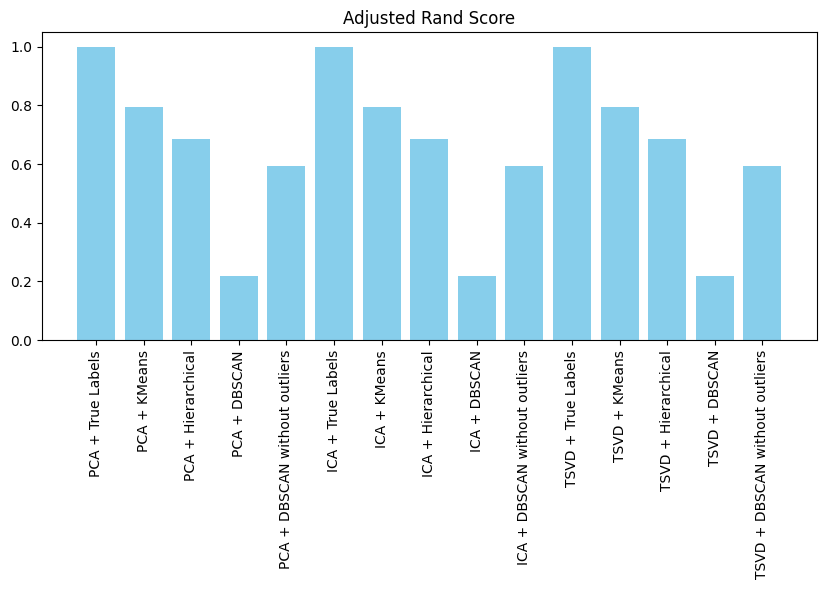

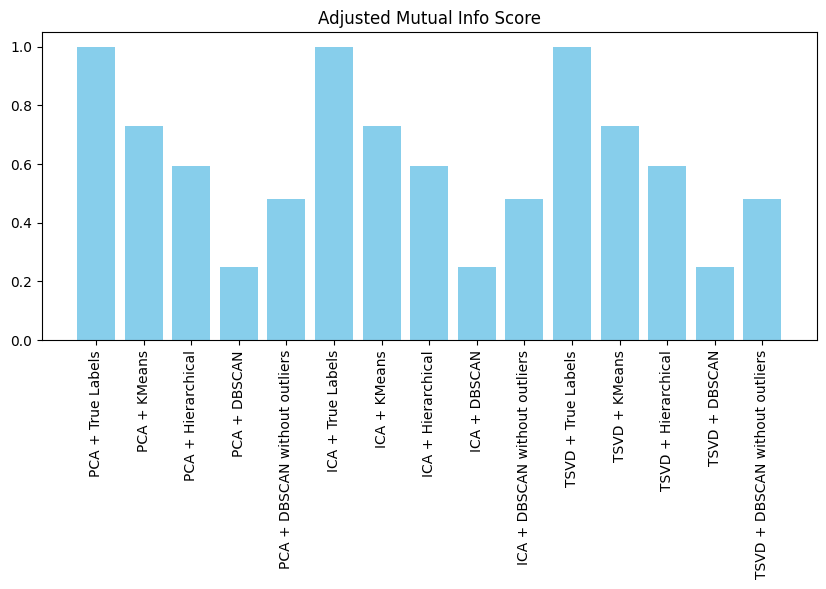

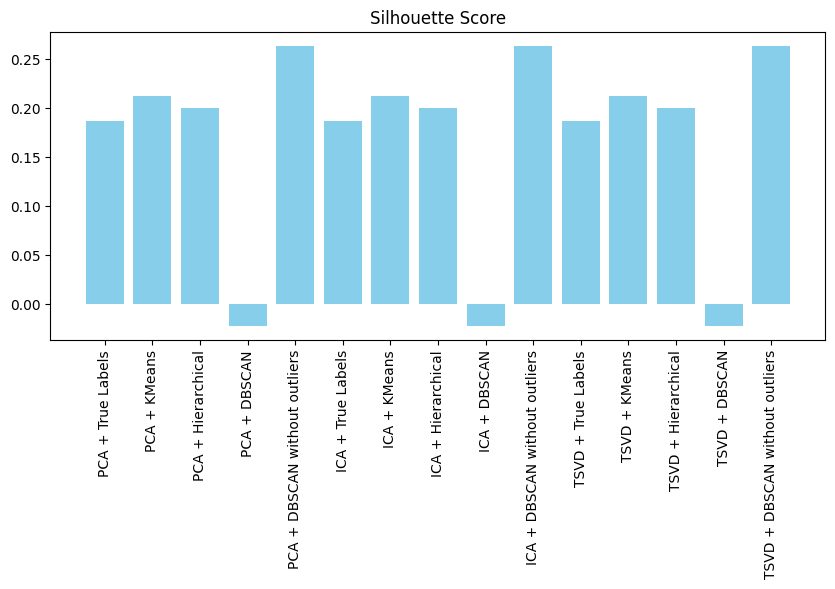

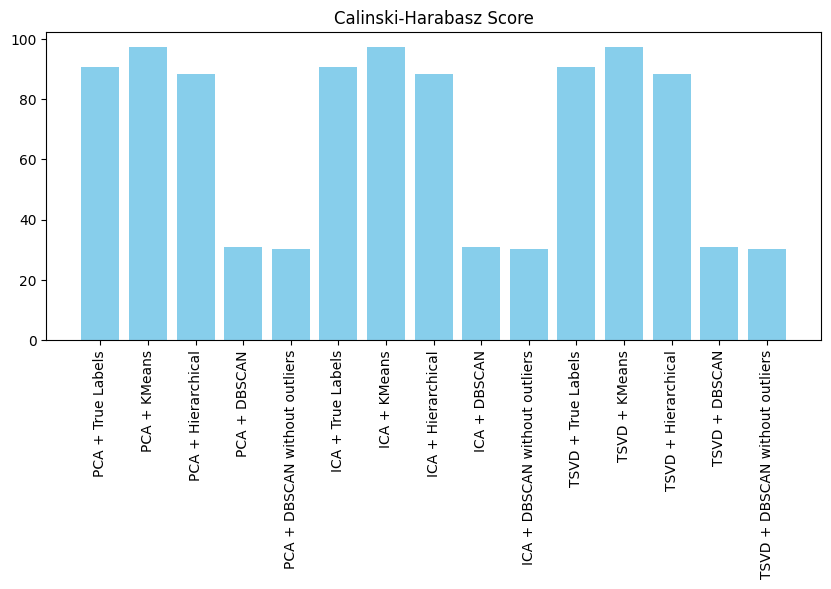

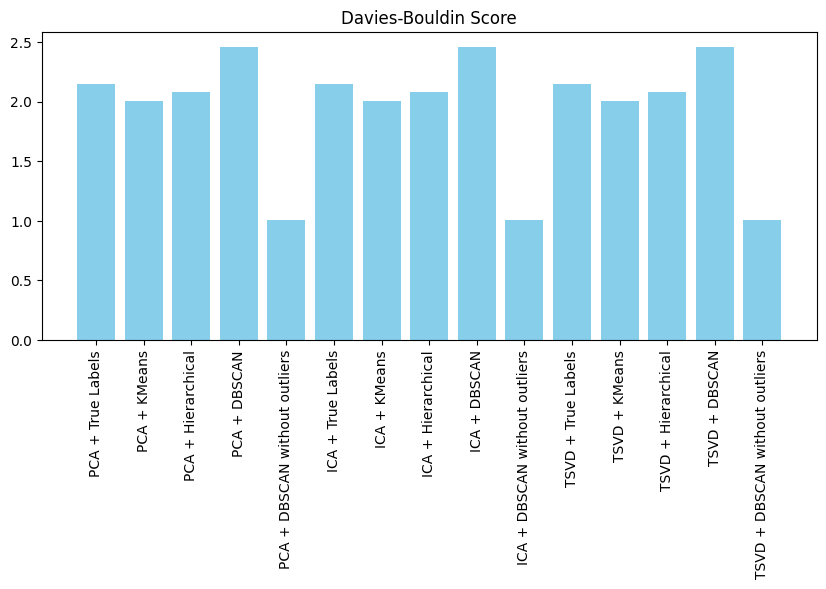

In [110]:
# Plotting the various evaluation metrics for the various combinations
evaluation_plots(metric_names, results)